In [1]:
# Setup and Check if GPU is available

import sys

import tensorflow.keras 
import pandas as pd
import sklearn as sk
import tensorflow as tf

print(f"Tensor Flow Version: {tf.__version__}")
print(f"Keras Version: {tensorflow.keras.__version__}")
print()
print(f"Python {sys.version}")
print(f"Pandas {pd.__version__}")
print(f"Scikit-Learn {sk.__version__}")
print("GPU is", "available" if tf.config.list_physical_devices('GPU') else "NOT AVAILABLE")

Tensor Flow Version: 2.1.0
Keras Version: 2.2.4-tf

Python 3.7.7 (default, Mar 23 2020, 23:19:08) [MSC v.1916 64 bit (AMD64)]
Pandas 1.0.3
Scikit-Learn 0.22.1
GPU is available


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
%matplotlib inline

np.random.seed(2)

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools

import tensorflow as tf

from tensorflow import keras

In [3]:
from tensorflow.keras import utils # convert to one-hot-encoding
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping

sns.set(style='white', context='notebook', palette='deep')

In [4]:
from PIL import Image
import os
from pylab import *
import re
from PIL import Image, ImageChops, ImageEnhance

In [5]:
def get_imlist(path):
    return [os.path.join(path,f) for f in os.listdir(path) if f.endswith('.jpg') or f.endswith('.png')]

In [6]:
def convert_to_ela_image(path, quality):
    filename = path
    resaved_filename = filename.split('.')[0] + '.resaved.jpg'
    ELA_filename = filename.split('.')[0] + '.ela.png'
    
    im = Image.open(filename).convert('RGB')
    im.save(resaved_filename, 'JPEG', quality=quality)
    resaved_im = Image.open(resaved_filename)
    
    ela_im = ImageChops.difference(im, resaved_im)
    
    extrema = ela_im.getextrema()
    max_diff = max([ex[1] for ex in extrema])
    if max_diff == 0:
        max_diff = 1
    scale = 255.0 / max_diff
    
    ela_im = ImageEnhance.Brightness(ela_im).enhance(scale)
    
    return ela_im

### Smaple image: Real image

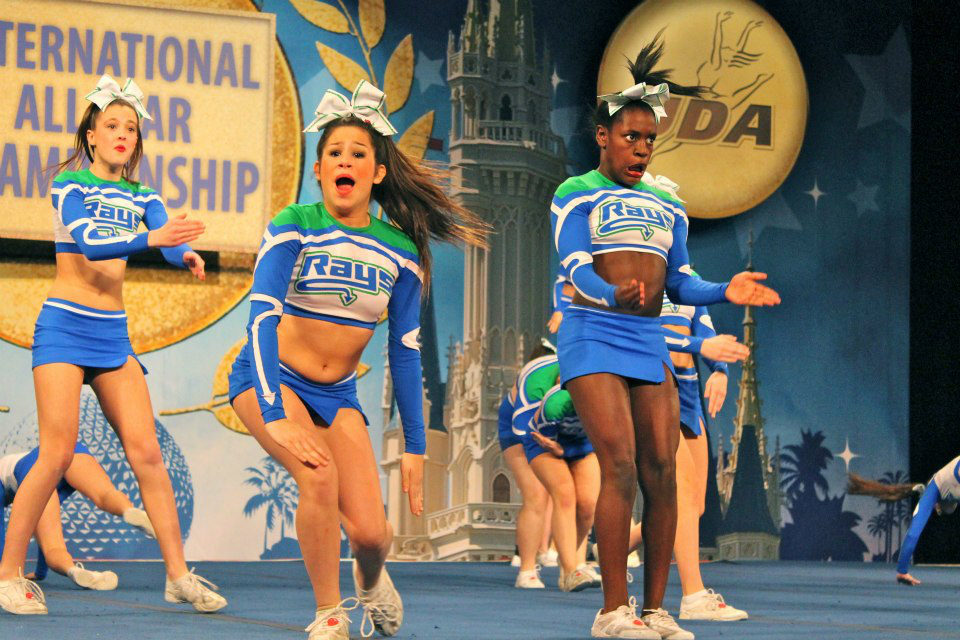

In [31]:
Image.open('D:/ML final project/PS_Battles/dataset/1a0qp3_true.jpg')

### Perform ELA

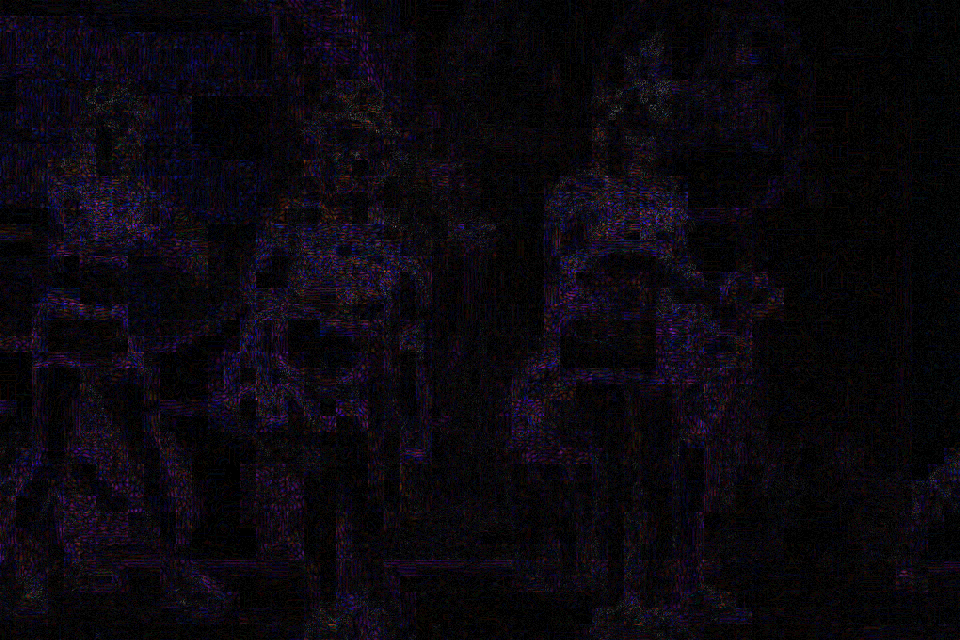

In [32]:
convert_to_ela_image('D:/ML final project/PS_Battles/dataset/1a0qp3_true.jpg', 90)

Let's try now using a fake image:

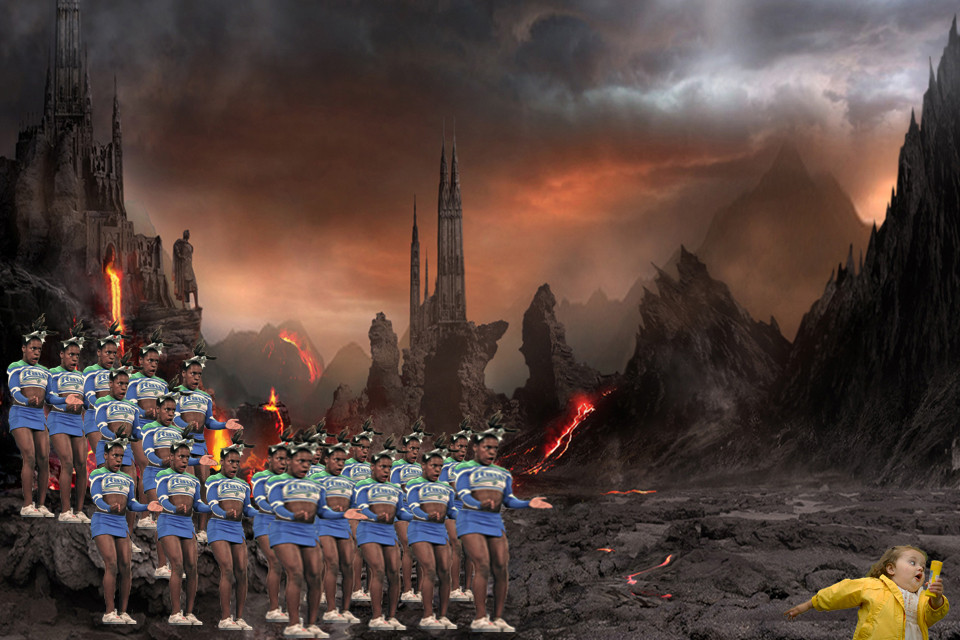

In [33]:
Image.open('D:/ML final project/PS_Battles/dataset/1a0qp3_fake.jpg')

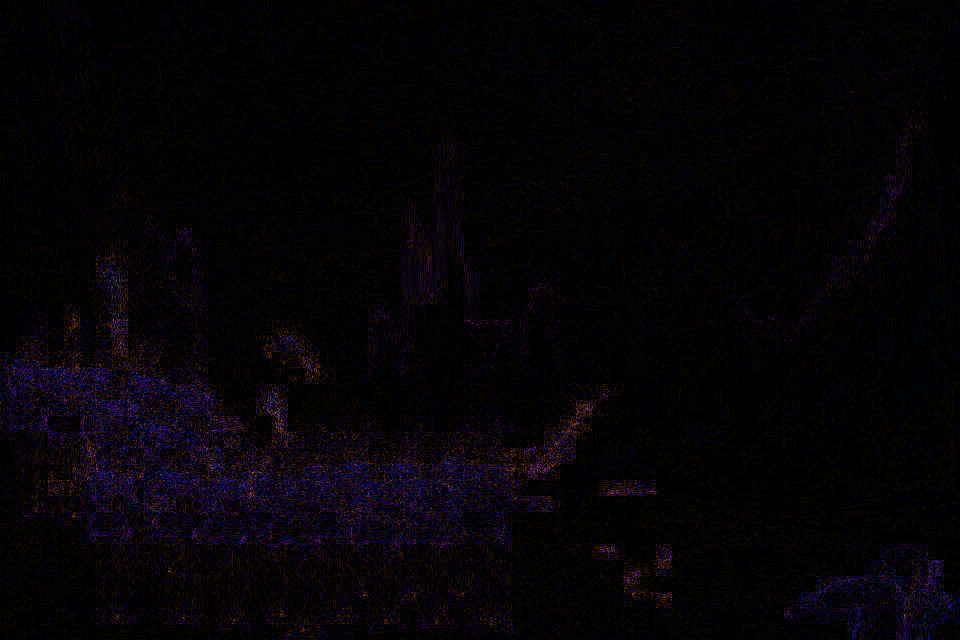

In [34]:
convert_to_ela_image('D:/ML final project/PS_Battles/dataset/1a0qp3_fake.jpg', 90)

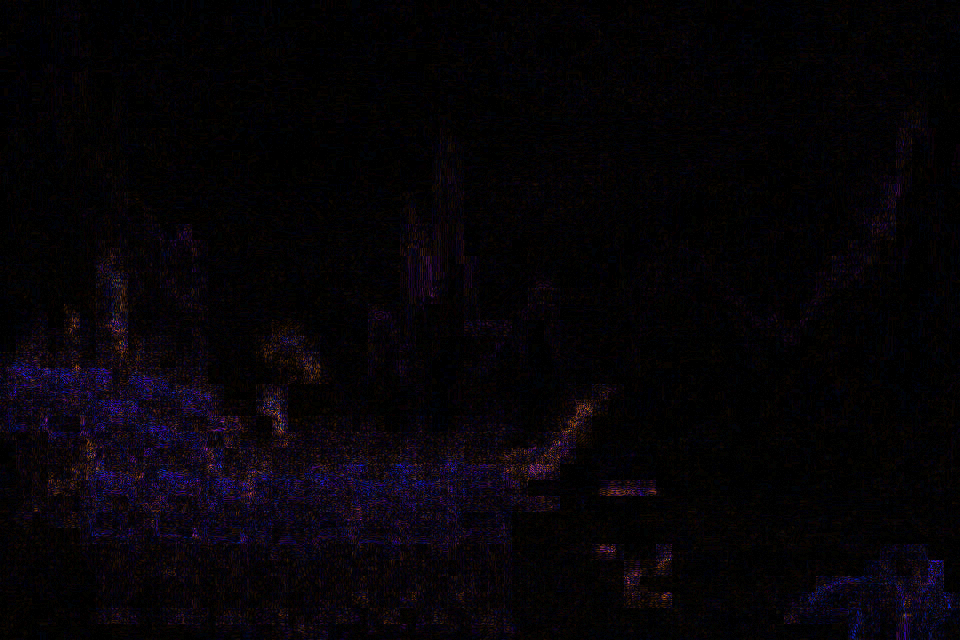

In [37]:
convert_to_ela_image('D:/ML final project/PS_Battles/dataset/1a0qp3_fake.jpg', 95)

### Create csv file contatining all images paths with their respective class

1: fake
0: real

In [7]:
paths = get_imlist('D:/ML final project/PS_Battles/dataset/')

In [8]:
paths

['D:/ML final project/PS_Battles/dataset/10092l_fake.jpg',
 'D:/ML final project/PS_Battles/dataset/10092l_fake.resaved.jpg',
 'D:/ML final project/PS_Battles/dataset/10092l_true.jpg',
 'D:/ML final project/PS_Battles/dataset/10092l_true.resaved.jpg',
 'D:/ML final project/PS_Battles/dataset/100c1k_fake.jpg',
 'D:/ML final project/PS_Battles/dataset/100c1k_fake.resaved.jpg',
 'D:/ML final project/PS_Battles/dataset/100c1k_true.jpg',
 'D:/ML final project/PS_Battles/dataset/100c1k_true.resaved.jpg',
 'D:/ML final project/PS_Battles/dataset/100d24_fake.jpg',
 'D:/ML final project/PS_Battles/dataset/100d24_fake.resaved.jpg',
 'D:/ML final project/PS_Battles/dataset/100d24_true.jpg',
 'D:/ML final project/PS_Battles/dataset/100d24_true.resaved.jpg',
 'D:/ML final project/PS_Battles/dataset/100jh1_fake.jpg',
 'D:/ML final project/PS_Battles/dataset/100jh1_fake.resaved.jpg',
 'D:/ML final project/PS_Battles/dataset/100jh1_true.jpg',
 'D:/ML final project/PS_Battles/dataset/100jh1_true.resave

In [9]:
print("There are {file_num} files in the folder".format(file_num = str(len(paths))))

There are 22034 files in the folder


In [10]:
dataset = pd.DataFrame(paths, columns = ['file_name'])

In [11]:
dataset['fake'] = 0

In [12]:
dataset['fake'] = np.where(dataset['file_name'].str.endswith('_fake.jpg'), 1, dataset['fake'])
dataset

file_name  fake
0      D:/ML final project/PS_Battles/dataset/10092l_...     1
1      D:/ML final project/PS_Battles/dataset/10092l_...     0
2      D:/ML final project/PS_Battles/dataset/10092l_...     0
3      D:/ML final project/PS_Battles/dataset/10092l_...     0
4      D:/ML final project/PS_Battles/dataset/100c1k_...     1
...                                                  ...   ...
22029  D:/ML final project/PS_Battles/dataset/zzkzg_t...     0
22030  D:/ML final project/PS_Battles/dataset/zzp03_f...     1
22031  D:/ML final project/PS_Battles/dataset/zzp03_t...     0
22032  D:/ML final project/PS_Battles/dataset/zztjs_f...     1
22033  D:/ML final project/PS_Battles/dataset/zztjs_t...     0

[22034 rows x 2 columns]

In [13]:
# proportions of fakes vs reals

pd.crosstab(index = dataset['fake'], columns = 'Freq')/len(paths)*100

col_0       Freq
fake            
0      51.819915
1      48.180085

Dataset is well balanced

In [14]:
X = []
Y = []

In [15]:
for index, row in dataset.iterrows():
    try:
        X.append(array(convert_to_ela_image(row[0], 90).resize((128, 128))).flatten() / 255.0)
        Y.append(row[1])
    except:
        pass

    if index % 500 == 0:
        
        print(index, "images parsed")

0 images parsed
500 images parsed
1000 images parsed
1500 images parsed
2000 images parsed


C:\Users\jdavi\miniconda3\envs\tensorflow\lib\site-packages\PIL\Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


2500 images parsed
3000 images parsed
3500 images parsed
4000 images parsed
4500 images parsed
5000 images parsed
5500 images parsed
6000 images parsed
6500 images parsed
7000 images parsed
7500 images parsed
8000 images parsed
8500 images parsed
9000 images parsed
9500 images parsed
10000 images parsed
10500 images parsed
11000 images parsed
11500 images parsed
12000 images parsed
12500 images parsed
13000 images parsed
13500 images parsed
14000 images parsed
14500 images parsed
15000 images parsed
15500 images parsed
16000 images parsed
16500 images parsed
17000 images parsed
17500 images parsed
18000 images parsed
18500 images parsed
19000 images parsed
19500 images parsed
20000 images parsed
20500 images parsed
21000 images parsed
21500 images parsed
22000 images parsed


In [32]:
X = np.array(X)

In [33]:
X = X.reshape(-1, 128, 128, 3)

In [34]:
X

array([[[[0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         ...,
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ]],

        [[0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         ...,
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ]],

        [[0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         ...,
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ]],

        ...,

        [[0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ]

In [35]:
Y = tf.keras.utils.to_categorical(Y, 2)

In [36]:
Y

array([[0., 1.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [0., 1.],
       [1., 0.]], dtype=float32)

In [42]:
# Save X to pickle file

import pickle

with open('ps-battles-ela-ds.pkl','wb') as f: pickle.dump(X, f)

MemoryError: 

In [44]:
np.save("D:/ML final project/PS_Battles/ps-battles-ela-ds.npy", X)

### Train & Test split

In [39]:
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size = 0.1, random_state=3)

MemoryError: Unable to allocate 825. MiB for an array with shape (2199, 128, 128, 3) and data type float64